# ***
<a name='T'>
<p style="background-color:#09E5E8;
          font-family:computermodern;
          color:#000000;font-size:300%;
          text-align:center;
          border-radius:10px 10px;
          ">Lung Cancer Prediction and Data Visualization</p>

<center>


<img src="https://storage.googleapis.com/kaggle-datasets-images/2636109/4510352/0bb8bbdffbb0da5a3505ffdc96ab9b40/dataset-card.png?t=2022-11-14-20-30-40" width="350" height="200" align="center"/>

In [1]:
# import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
from sklearn.model_selection import train_test_split 
import warnings
from sklearn.metrics import precision_score, recall_score, accuracy_score, f1_score, confusion_matrix, ConfusionMatrixDisplay, classification_report
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, ExtraTreesClassifier
import pickle
warnings.filterwarnings("ignore")

# <p style="font-size:0%;color:white;"><b> 1 - Data Meaning </b></p>

<a name='DM'>
    
<div style="color:white;display:width;border-radius:10px;
            background-color:#09E5E8;
            font-size:200%;
            font-family:computermodern;
            letter-spacing:0.75px">
    <p style="padding: 8px;color:black;"><b> 1 | Data Meaning </b></p>
</div>
 

- This dataset contains information on patients with lung cancer, including their age, gender, air pollution exposure, alcohol use, dust allergy, occupational hazards, genetic risk, chronic lung disease, balanced diet, obesity, smoking status, passive smoker status, chest pain, coughing of blood, fatigue levels, weight loss, shortness of breath, wheezing, swallowing difficulty, clubbing of finger nails, frequent colds, dry coughs, and snoring. 
    

|   Columns   |   Meaning   |
| ----------- | ----------- |
| Age           | The age of the patient. (Numeric)       |
| Gender        |  The gender of the patient. (Categorical)        |
| Air Pollution | The level of air pollution exposure of the patient. (Categorical)|
| Alcohol use   | The level of alcohol use of the patient. (Categorical)|
| Dust Allergy  |The level of dust allergy of the patient. (Categorical)|
| ccuPational Hazards  | The level of occupational hazards of the patient. (Categorical)|
| Genetic Risk         | The level of genetic risk of the patient. (Categorical)|
| chronic Lung Disease | The level of chronic lung disease of the patient. (Categorical)|
| Balanced Diet | The level of balanced diet of the patient. (Categorical)|
| Obesity       | The level of obesity of the patient. (Categorical)|
| Smoking       | The level of smoking of the patient. (Categorical)|
| Passive Smoker       | The level of passive smoker of the patient. (Categorical)|
| Chest Pain           | The level of chest pain of the patient. (Categorical)|
| Coughing of Blood    | The level of coughing of blood of the patient. (Categorical)|
| Fatigue       | The level of fatigue of the patient. (Categorical)|
| Weight Loss   | The level of weight loss of the patient. (Categorical)|
| Shortness of Breath  | The level of shortness of breath of the patient. (Categorical)|
| Wheezing      | The level of wheezing of the patient. (Categorical)|
| Swallowing Difficulty | The level of swallowing difficulty of the patient. (Categorical)|
| Clubbing of Finger Nails | The level of clubbing of finger nails of the patient. (Categorical)|


- The level of cancer severity column, is divided into three levels, `low`, `medium` and `high`. We'll analyze and develop a predictive method for the level of severity of the cancer. By analyzing this data we'll gain insight into what causes lung cancer and how best to prevent it.
    
# <p style="font-size:0%;color:white;"><b> 2 - Importing and Initial Analysis </b></p>
*** 
<a name='IIA'>
<div style="color:white;display:width;border-radius:10px;
            background-color:#09E5E8;
            font-size:200%;
            font-family:computermodern;
            letter-spacing:0.75px">
    <p style="padding: 8px;color:black;"><b> 2 | Importing and Initial Analysis </b></p>
</div>

In [42]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [43]:
df = pd.read_csv("cancer patient data sets.csv")

df

index Patient Id  Age  Gender  Air Pollution  Alcohol use  Dust Allergy  \
0        0         P1   33       1              2            4             5   
1        1        P10   17       1              3            1             5   
2        2       P100   35       1              4            5             6   
3        3      P1000   37       1              7            7             7   
4        4       P101   46       1              6            8             7   
5        5       P102   35       1              4            5             6   
6        6       P103   52       2              2            4             5   
7        7       P104   28       2              3            1             4   
8        8       P105   35       2              4            5             6   
9        9       P106   46       1              2            3             4   
10      10       P107   44       1              6            7             7   
11      11       P108   64       2              6            8             7   
12      12       P109   39       2              4            5             6   
13      13        P11   34       1              6            7             7   
14      14       P110   27       2              3            1             4   
15      15       P111   73       1              5            6             6   
16      16       P112   17       1              3            1             5   
17      17       P113   34       1              6            7             7   
18      18       P114   36       1              6            7             7   
19      19       P115   14       1              2            4             5   
20      20       P116   24       1              6            8             7   
21      21       P117   53       2              4            5             6   
22      22       P118   62       1              6            8             7   
23      23       P119   29       2              6            7             7   
24      24        P12   36       1              6            7             7   
25      25       P120   65       1              6            8             7   
26      26       P121   38       2              2            1             5   
27      27       P122   19       1              3            2             4   
28      28       P123   33       1              6            7             7   
29      29       P124   28       2              1            6             7   
30      30       P125   35       2              2            6             2   
31      31       P126   42       1              2            4             5   
32      32       P127   32       2              1            6             7   
33      33       P128   33       1              2            4             5   
34      34       P129   25       2              3            1             4   
35      35        P13   14       1              2            4             5   
36      36       P130   27       2              3            1             4   
37      37       P131   28       1              6            7             8   
38      38       P132   32       1              2            3             6   
39      39       P133   45       2              1            2             4   
40      40       P134   27       2              3            1             4   
41      41       P135   26       2              2            3             1   
42      42       P136   48       1              4            2             3   
43      43       P137   17       2              1            2             3   
44      44       P138   22       1              2            1             3   
45      45       P139   42       1              2            1             2   
46      46        P14   24       1              6            8             7   
47      47       P140   35       1              1            3             2   
48      48       P141   24       2              1            2             2   
49   

In [44]:
df.head()

index Patient Id  Age  Gender  Air Pollution  Alcohol use  Dust Allergy  \
0      0         P1   33       1              2            4             5   
1      1        P10   17       1              3            1             5   
2      2       P100   35       1              4            5             6   
3      3      P1000   37       1              7            7             7   
4      4       P101   46       1              6            8             7   

   OccuPational Hazards  Genetic Risk  chronic Lung Disease  Balanced Diet  \
0                     4             3                     2              2   
1                     3             4                     2              2   
2                     5             5                     4              6   
3                     7             6                     7              7   
4                     7             7                     6              7   

   Obesity  Smoking  Passive Smoker  Chest Pain  Coughing of Blood  Fatigue  \
0        4        3               2           2                  4        3   
1        2        2               4           2                  3        1   
2        7        2               3           4                  8        8   
3        7        7               7           7                  8        4   
4        7        8               7           7                  9        3   

   Weight Loss  Shortness of Breath  Wheezing  Swallowing Difficulty  \
0            4                    2         2                      3   
1            3                    7         8                      6   
2            7                    9         2                      1   
3            2                    3         1                      4   
4            2                    4         1                      4   

   Clubbing of Finger Nails  Frequent Cold  Dry Cough  Snoring   Level  
0                         1              2          3        4     Low  
1                         2              1          7        2  Medium  
2                         4              6          7        2    High  
3                         5              6          7        5    High  
4                         2              4          2        3    High

In [45]:
df.isnull().sum()

index                       0
Patient Id                  0
Age                         0
Gender                      0
Air Pollution               0
Alcohol use                 0
Dust Allergy                0
OccuPational Hazards        0
Genetic Risk                0
chronic Lung Disease        0
Balanced Diet               0
Obesity                     0
Smoking                     0
Passive Smoker              0
Chest Pain                  0
Coughing of Blood           0
Fatigue                     0
Weight Loss                 0
Shortness of Breath         0
Wheezing                    0
Swallowing Difficulty       0
Clubbing of Finger Nails    0
Frequent Cold               0
Dry Cough                   0
Snoring                     0
Level                       0
dtype: int64

In [46]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 26 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   index                     1000 non-null   int64 
 1   Patient Id                1000 non-null   object
 2   Age                       1000 non-null   int64 
 3   Gender                    1000 non-null   int64 
 4   Air Pollution             1000 non-null   int64 
 5   Alcohol use               1000 non-null   int64 
 6   Dust Allergy              1000 non-null   int64 
 7   OccuPational Hazards      1000 non-null   int64 
 8   Genetic Risk              1000 non-null   int64 
 9   chronic Lung Disease      1000 non-null   int64 
 10  Balanced Diet             1000 non-null   int64 
 11  Obesity                   1000 non-null   int64 
 12  Smoking                   1000 non-null   int64 
 13  Passive Smoker            1000 non-null   int64 
 14  Chest Pain               

In [47]:
df.shape

(1000, 26)

In [10]:
df.describe().T

count     mean         std   min     25%    50%  \
index                     1000.0  499.500  288.819436   0.0  249.75  499.5   
Age                       1000.0   37.174   12.005493  14.0   27.75   36.0   
Gender                    1000.0    1.402    0.490547   1.0    1.00    1.0   
Air Pollution             1000.0    3.840    2.030400   1.0    2.00    3.0   
Alcohol use               1000.0    4.563    2.620477   1.0    2.00    5.0   
Dust Allergy              1000.0    5.165    1.980833   1.0    4.00    6.0   
OccuPational Hazards      1000.0    4.840    2.107805   1.0    3.00    5.0   
Genetic Risk              1000.0    4.580    2.126999   1.0    2.00    5.0   
chronic Lung Disease      1000.0    4.380    1.848518   1.0    3.00    4.0   
Balanced Diet             1000.0    4.491    2.135528   1.0    2.00    4.0   
Obesity                   1000.0    4.465    2.124921   1.0    3.00    4.0   
Smoking                   1000.0    3.948    2.495902   1.0    2.00    3.0   
Passive Smoker            1000.0    4.195    2.311778   1.0    2.00    4.0   
Chest Pain                1000.0    4.438    2.280209   1.0    2.00    4.0   
Coughing of Blood         1000.0    4.859    2.427965   1.0    3.00    4.0   
Fatigue                   1000.0    3.856    2.244616   1.0    2.00    3.0   
Weight Loss               1000.0    3.855    2.206546   1.0    2.00    3.0   
Shortness of Breath       1000.0    4.240    2.285087   1.0    2.00    4.0   
Wheezing                  1000.0    3.777    2.041921   1.0    2.00    4.0   
Swallowing Difficulty     1000.0    3.746    2.270383   1.0    2.00    4.0   
Clubbing of Finger Nails  1000.0    3.923    2.388048   1.0    2.00    4.0   
Frequent Cold             1000.0    3.536    1.832502   1.0    2.00    3.0   
Dry Cough                 1000.0    3.853    2.039007   1.0    2.00    4.0   
Snoring                   1000.0    2.926    1.474686   1.0    2.00    3.0   

                             75%    max  
index                     749.25  999.0  
Age                        45.00   73.0  
Gender                      2.00    2.0  
Air Pollution               6.00    8.0  
Alcohol use                 7.00    8.0  
Dust Allergy                7.00    8.0  
OccuPational Hazards        7.00    8.0  
Genetic Risk                7.00    7.0  
chronic Lung Disease        6.00    7.0  
Balanced Diet               7.00    7.0  
Obesity                     7.00    7.0  
Smoking                     7.00    8.0  
Passive Smoker              7.00    8.0  
Chest Pain                  7.00    9.0  
Coughing of Blood           7.00    9.0  
Fatigue                     5.00    9.0  
Weight Loss                 6.00    8.0  
Shortness of Breath         6.00    9.0  
Wheezing                    5.00    8.0  
Swallowing Difficulty       5.00    8.0  
Clubbing of Finger Nails    5.00    9.0  
Frequent Cold               5.00    7.0  
Dry Cough                   6.00    7.0  
Snoring                     4.00    7.0

In [11]:
df.drop_duplicates()

index Patient Id  Age  Gender  Air Pollution  Alcohol use  Dust Allergy  \
0        0         P1   33       1              2            4             5   
1        1        P10   17       1              3            1             5   
2        2       P100   35       1              4            5             6   
3        3      P1000   37       1              7            7             7   
4        4       P101   46       1              6            8             7   
..     ...        ...  ...     ...            ...          ...           ...   
995    995       P995   44       1              6            7             7   
996    996       P996   37       2              6            8             7   
997    997       P997   25       2              4            5             6   
998    998       P998   18       2              6            8             7   
999    999       P999   47       1              6            5             6   

     OccuPational Hazards  Genetic Risk  chronic Lung Disease  ...  Fatigue  \
0                       4             3                     2  ...        3   
1                       3             4                     2  ...        1   
2                       5             5                     4  ...        8   
3                       7             6                     7  ...        4   
4                       7             7                     6  ...        3   
..                    ...           ...                   ...  ...      ...   
995                     7             7                     6  ...        5   
996                     7             7                     6  ...        9   
997                     5             5                     4  ...        8   
998                     7             7                     6  ...        3   
999                     5             5                     4  ...        8   

     Weight Loss  Shortness of Breath  Wheezing  Swallowing Difficulty  \
0              4                    2         2                      3   
1              3                    7         8                      6   
2              7                    9         2                      1   
3              2                    3         1                      4   
4              2                    4         1                      4   
..           ...                  ...       ...                    ...   
995            3                    2         7                      8   
996            6                    5         7                      2   
997            7                    9         2                      1   
998            2                    4         1                      4   
999            7                    9         2                      1   

     Clubbing of Finger Nails  Frequent Cold  Dry Cough  Snoring   Level  
0                           1              2          3        4     Low  
1                           2              1          7        2  Medium  
2                           4              6          7        2    High  
3                           5              6          7        5    High  
4                           2              4          2        3    High  
..                        ...            ...        ...      ...     ...  
995                         2              4          5        3    High  
996                         4              3          1        4    High  
997                         4              6          7        2    High  
998                         2              4          2        3    High  
999                         4              6          7        2    High  

[1000 rows x 26 columns]

In [51]:
df.drop(columns=['index','Patient Id'],axis=1 ,inplace=True)

In [13]:
df

Age  Gender  Air Pollution  Alcohol use  Dust Allergy  \
0     33       1              2            4             5   
1     17       1              3            1             5   
2     35       1              4            5             6   
3     37       1              7            7             7   
4     46       1              6            8             7   
..   ...     ...            ...          ...           ...   
995   44       1              6            7             7   
996   37       2              6            8             7   
997   25       2              4            5             6   
998   18       2              6            8             7   
999   47       1              6            5             6   

     OccuPational Hazards  Genetic Risk  chronic Lung Disease  Balanced Diet  \
0                       4             3                     2              2   
1                       3             4                     2              2   
2                       5             5                     4              6   
3                       7             6                     7              7   
4                       7             7                     6              7   
..                    ...           ...                   ...            ...   
995                     7             7                     6              7   
996                     7             7                     6              7   
997                     5             5                     4              6   
998                     7             7                     6              7   
999                     5             5                     4              6   

     Obesity  ...  Fatigue  Weight Loss  Shortness of Breath  Wheezing  \
0          4  ...        3            4                    2         2   
1          2  ...        1            3                    7         8   
2          7  ...        8            7                    9         2   
3          7  ...        4            2                    3         1   
4          7  ...        3            2                    4         1   
..       ...  ...      ...          ...                  ...       ...   
995        7  ...        5            3                    2         7   
996        7  ...        9            6                    5         7   
997        7  ...        8            7                    9         2   
998        7  ...        3            2                    4         1   
999        7  ...        8            7                    9         2   

     Swallowing Difficulty  Clubbing of Finger Nails  Frequent Cold  \
0                        3                         1              2   
1                        6                         2              1   
2                        1                         4              6   
3                        4                         5              6   
4                        4                         2              4   
..                     ...                       ...            ...   
995                      8                         2              4   
996                      2                         4              3   
997                      1                         4              6   
998                      4                         2              4   
999                      1                         4              6   

     Dry Cough  Snoring   Level  
0            3        4     Low  
1            7        2  Medium  
2            7        2    High  
3            7        5    High  
4            2        3    High  
..         ...      ...     ...  
995          5        3    High  
996          1        4    High  
997          7        2    High  
998          2        3    High  
999          7        2    High  

[1000 rows x 24 columns]

In [38]:
df_corr =df.corr()

In [39]:
df_corr

Age    Gender  Air Pollution  Alcohol use  \
Age                       1.000000 -0.202086       0.099494     0.151742   
Gender                   -0.202086  1.000000      -0.246912    -0.227636   
Air Pollution             0.099494 -0.246912       1.000000     0.747293   
Alcohol use               0.151742 -0.227636       0.747293     1.000000   
Dust Allergy              0.035202 -0.204312       0.637503     0.818644   
OccuPational Hazards      0.062177 -0.192343       0.608924     0.878786   
Genetic Risk              0.073151 -0.222727       0.705276     0.877210   
chronic Lung Disease      0.128952 -0.205061       0.626701     0.763576   
Balanced Diet             0.004863 -0.099741       0.524873     0.653352   
Obesity                   0.034337 -0.123813       0.601468     0.669312   
Smoking                   0.075333 -0.206924       0.481902     0.547035   
Passive Smoker            0.004908 -0.184826       0.606764     0.592576   
Chest Pain                0.012864 -0.218426       0.585734     0.717242   
Coughing of Blood         0.053006 -0.146505       0.607829     0.667612   
Fatigue                   0.095059 -0.116467       0.211724     0.237245   
Weight Loss               0.106946 -0.057993       0.258016     0.207851   
Shortness of Breath       0.035329 -0.045972       0.269558     0.435785   
Wheezing                 -0.095354 -0.076304       0.055368     0.180817   
Swallowing Difficulty    -0.105833 -0.058324      -0.080918    -0.114073   
Clubbing of Finger Nails  0.039258 -0.034219       0.241065     0.414992   
Frequent Cold            -0.012706 -0.000526       0.174539     0.180778   
Dry Cough                 0.012128 -0.123001       0.261489     0.211277   
Snoring                  -0.004700 -0.181618      -0.021343     0.122694   
Level                     0.060048 -0.164985       0.636038     0.718710   

                          Dust Allergy  OccuPational Hazards  Genetic Risk  \
Age                           0.035202              0.062177      0.073151   
Gender                       -0.204312             -0.192343     -0.222727   
Air Pollution                 0.637503              0.608924      0.705276   
Alcohol use                   0.818644              0.878786      0.877210   
Dust Allergy                  1.000000              0.835860      0.787904   
OccuPational Hazards          0.835860              1.000000      0.893049   
Genetic Risk                  0.787904              0.893049      1.000000   
chronic Lung Disease          0.619556              0.858284      0.836231   
Balanced Diet                 0.647197              0.691509      0.679905   
Obesity                       0.700676              0.722191      0.729826   
Smoking                       0.358691              0.497693      0.543259   
Passive Smoker                0.560002              0.555311      0.609071   
Chest Pain                    0.639983              0.775619      0.831751   
Coughing of Blood             0.625291              0.645947      0.632236   
Fatigue                       0.332472              0.267844      0.230530   
Weight Loss                   0.321756              0.176226      0.271743   
Shortness of Breath           0.518682              0.366482      0.458200   
Wheezing                      0.304850              0.178925      0.204973   
Swallowing Difficulty         0.031141             -0.002853     -0.062948   
Clubbing of Finger Nails      0.345714              0.366447      0.357815   
Frequent Cold                 0.219389              0.077166      0.087092   
Dry Cough                     0.300195              0.159887      0.194399   
Snoring                       0.052844              0.022916     -0.056831   
Level                         0.713839              0.673255      0.701303   

                          chronic Lung Disease  Balanced Diet   Obesity  ...  \
Age                                   0.128952       0.004863  0.034337  ...   
Gender             

<Axes: >

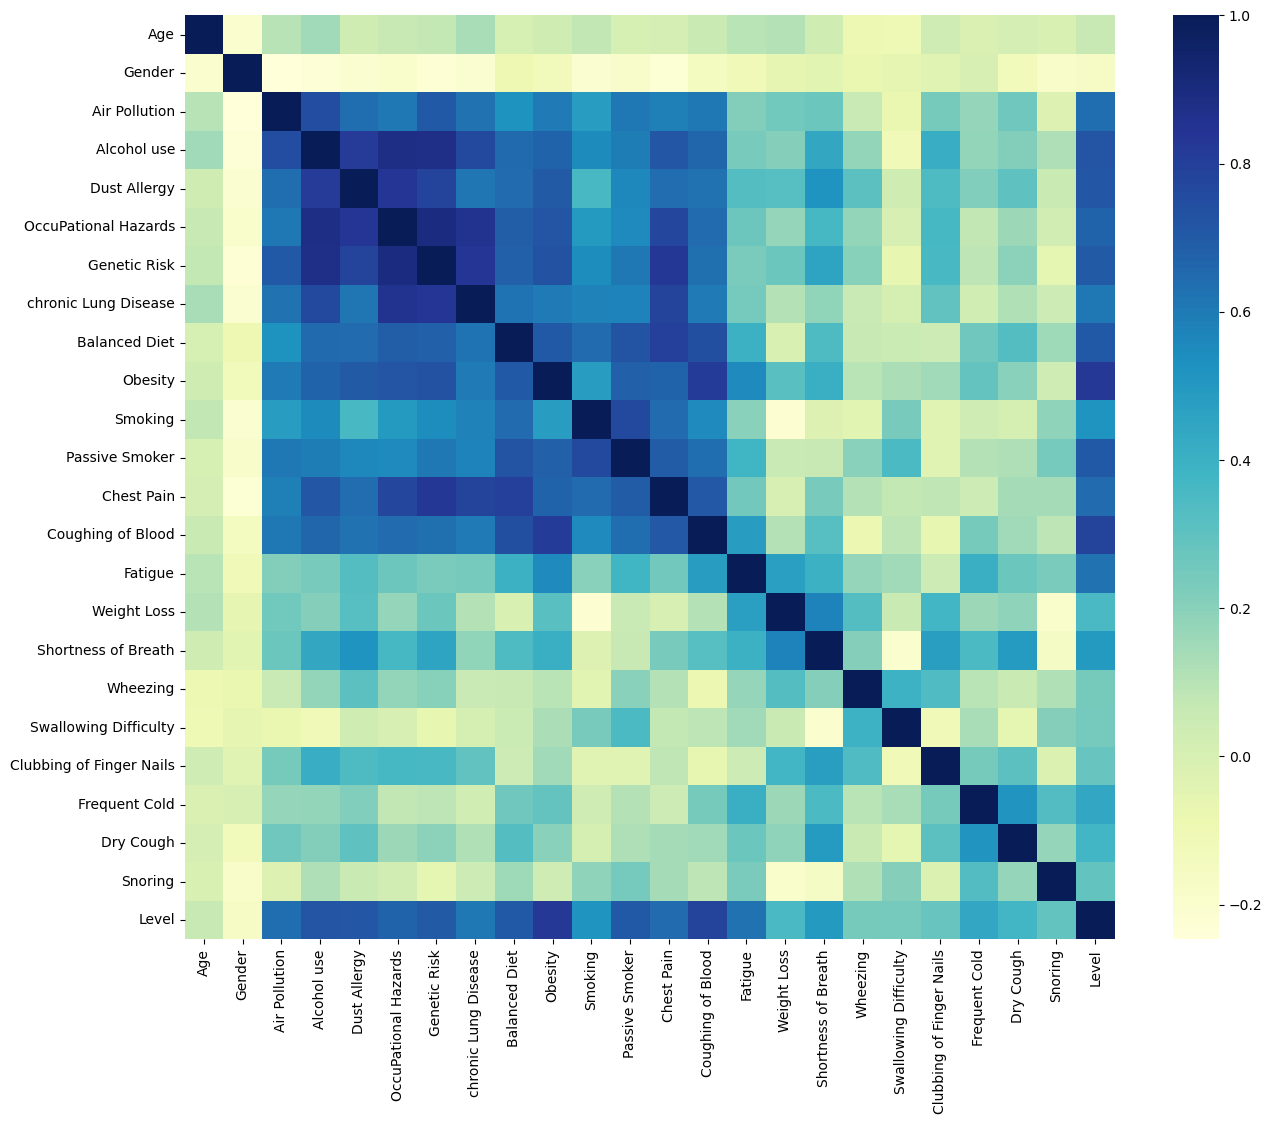

In [40]:
plt.figure(figsize=(15,12))
sns.heatmap(df_corr, cmap='YlGnBu')


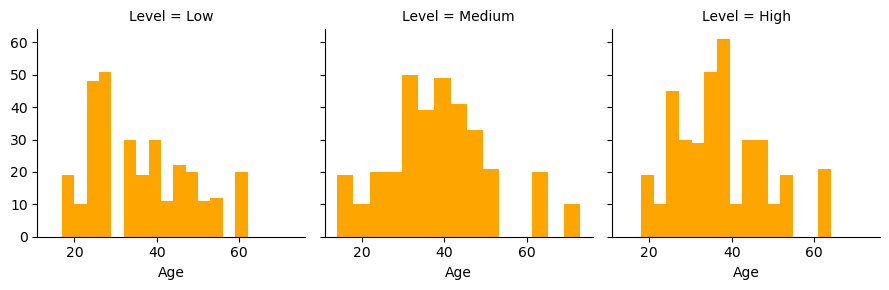

In [17]:
graph = sns.FacetGrid(df, col = "Level", height =3)
#sea.map(sns.distplot, "Age"
graph.map(plt.hist, 'Age', bins = 15, color ='orange')

#graph.map(plt.scatter,  "Age", edgecolor ="w").add_legend()
plt.show()


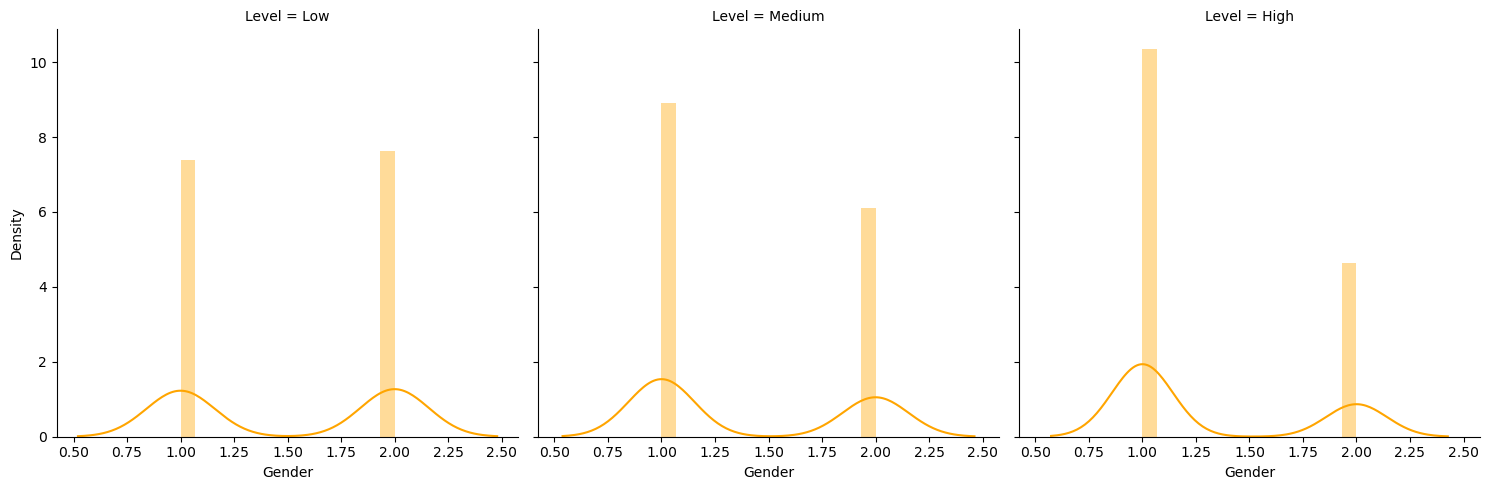

In [18]:
graph = sns.FacetGrid(df, col = "Level", height =5)
graph.map(sns.distplot, 'Gender', bins = 15, color ='orange')
plt.show()


In [50]:
df

index Patient Id  Age  Gender  Air Pollution  Alcohol use  Dust Allergy  \
0        0         P1   33       1              2            4             5   
1        1        P10   17       1              3            1             5   
2        2       P100   35       1              4            5             6   
3        3      P1000   37       1              7            7             7   
4        4       P101   46       1              6            8             7   
5        5       P102   35       1              4            5             6   
6        6       P103   52       2              2            4             5   
7        7       P104   28       2              3            1             4   
8        8       P105   35       2              4            5             6   
9        9       P106   46       1              2            3             4   
10      10       P107   44       1              6            7             7   
11      11       P108   64       2              6            8             7   
12      12       P109   39       2              4            5             6   
13      13        P11   34       1              6            7             7   
14      14       P110   27       2              3            1             4   
15      15       P111   73       1              5            6             6   
16      16       P112   17       1              3            1             5   
17      17       P113   34       1              6            7             7   
18      18       P114   36       1              6            7             7   
19      19       P115   14       1              2            4             5   
20      20       P116   24       1              6            8             7   
21      21       P117   53       2              4            5             6   
22      22       P118   62       1              6            8             7   
23      23       P119   29       2              6            7             7   
24      24        P12   36       1              6            7             7   
25      25       P120   65       1              6            8             7   
26      26       P121   38       2              2            1             5   
27      27       P122   19       1              3            2             4   
28      28       P123   33       1              6            7             7   
29      29       P124   28       2              1            6             7   
30      30       P125   35       2              2            6             2   
31      31       P126   42       1              2            4             5   
32      32       P127   32       2              1            6             7   
33      33       P128   33       1              2            4             5   
34      34       P129   25       2              3            1             4   
35      35        P13   14       1              2            4             5   
36      36       P130   27       2              3            1             4   
37      37       P131   28       1              6            7             8   
38      38       P132   32       1              2            3             6   
39      39       P133   45       2              1            2             4   
40      40       P134   27       2              3            1             4   
41      41       P135   26       2              2            3             1   
42      42       P136   48       1              4            2             3   
43      43       P137   17       2              1            2             3   
44      44       P138   22       1              2            1             3   
45      45       P139   42       1              2            1             2   
46      46        P14   24       1              6            8             7   
47      47       P140   35       1              1            3             2   
48      48       P141   24       2              1            2             2   
49   

In [65]:
def unique(i):
    print(f'{i} : The Number of Unique {df[i].nunique()} The Value of Unique {df[i].unique()}')
   # print("{}".format(i))
    #print(df[i].nunique())
    print("-"*50)
    
for i in df.select_dtypes(exclude="object"):
    unique(i)

Age : The Number of Unique 40 The Value of Unique [33 17 35 37 46 52 28 44 64 39 34 27 73 36 14 24 53 62 29 65 38 19 42 32
 25 45 26 48 22 18 23 47 61 55 31 49 43 51 54 63]
--------------------------------------------------
Gender : The Number of Unique 2 The Value of Unique [1 2]
--------------------------------------------------
Air Pollution : The Number of Unique 8 The Value of Unique [2 3 4 7 6 5 1 8]
--------------------------------------------------
Alcohol use : The Number of Unique 8 The Value of Unique [4 1 5 7 8 3 6 2]
--------------------------------------------------
Dust Allergy : The Number of Unique 8 The Value of Unique [5 6 7 4 2 8 1 3]
--------------------------------------------------
OccuPational Hazards : The Number of Unique 8 The Value of Unique [4 3 5 7 2 6 8 1]
--------------------------------------------------
Genetic Risk : The Number of Unique 7 The Value of Unique [3 4 5 6 7 2 1]
--------------------------------------------------
chronic Lung Disease : The

In [66]:
df.Level.unique()

array(['Low', 'Medium', 'High'], dtype=object)

In [67]:
df['Level'].value_counts()


Level
High      365
Medium    332
Low       303
Name: count, dtype: int64

In [68]:
df['Level'].replace(to_replace='Low' ,value=0 ,inplace=True)
df['Level'].replace(to_replace='Medium' ,value=1 ,inplace=True)
df['Level'].replace(to_replace='High' ,value=2,inplace=True)

In [69]:
df['Level'].value_counts()

Level
2    365
1    332
0    303
Name: count, dtype: int64

In [70]:
df

Age  Gender  Air Pollution  Alcohol use  Dust Allergy  \
0     33       1              2            4             5   
1     17       1              3            1             5   
2     35       1              4            5             6   
3     37       1              7            7             7   
4     46       1              6            8             7   
5     35       1              4            5             6   
6     52       2              2            4             5   
7     28       2              3            1             4   
8     35       2              4            5             6   
9     46       1              2            3             4   
10    44       1              6            7             7   
11    64       2              6            8             7   
12    39       2              4            5             6   
13    34       1              6            7             7   
14    27       2              3            1             4   
15    73       1              5            6             6   
16    17       1              3            1             5   
17    34       1              6            7             7   
18    36       1              6            7             7   
19    14       1              2            4             5   
20    24       1              6            8             7   
21    53       2              4            5             6   
22    62       1              6            8             7   
23    29       2              6            7             7   
24    36       1              6            7             7   
25    65       1              6            8             7   
26    38       2              2            1             5   
27    19       1              3            2             4   
28    33       1              6            7             7   
29    28       2              1            6             7   
30    35       2              2            6             2   
31    42       1              2            4             5   
32    32       2              1            6             7   
33    33       1              2            4             5   
34    25       2              3            1             4   
35    14       1              2            4             5   
36    27       2              3            1             4   
37    28       1              6            7             8   
38    32       1              2            3             6   
39    45       2              1            2             4   
40    27       2              3            1             4   
41    26       2              2            3             1   
42    48       1              4            2             3   
43    17       2              1            2             3   
44    22       1              2            1             3   
45    42       1              2            1             2   
46    24       1              6            8             7   
47    35       1              1            3             2   
48    24       2              1            2             2   
49    38       2              3            2             3   
50    18       2              3            2             1   
51    23       2              4            2             3   
52    24       2              3            2             2   
53    35       2              2            1             2   
54    38       2              5            2             3   
55    47       2              2            3             1   
56    52       2              3            2             1   
57    53       2              4            5             6   
58    44       2              2            3             2   
59    38       2              2            3             5   
60    62       2              3            2             1   
61    61       2              2            3             4   
62    55       1              3            1             1   
63    45       2              1      

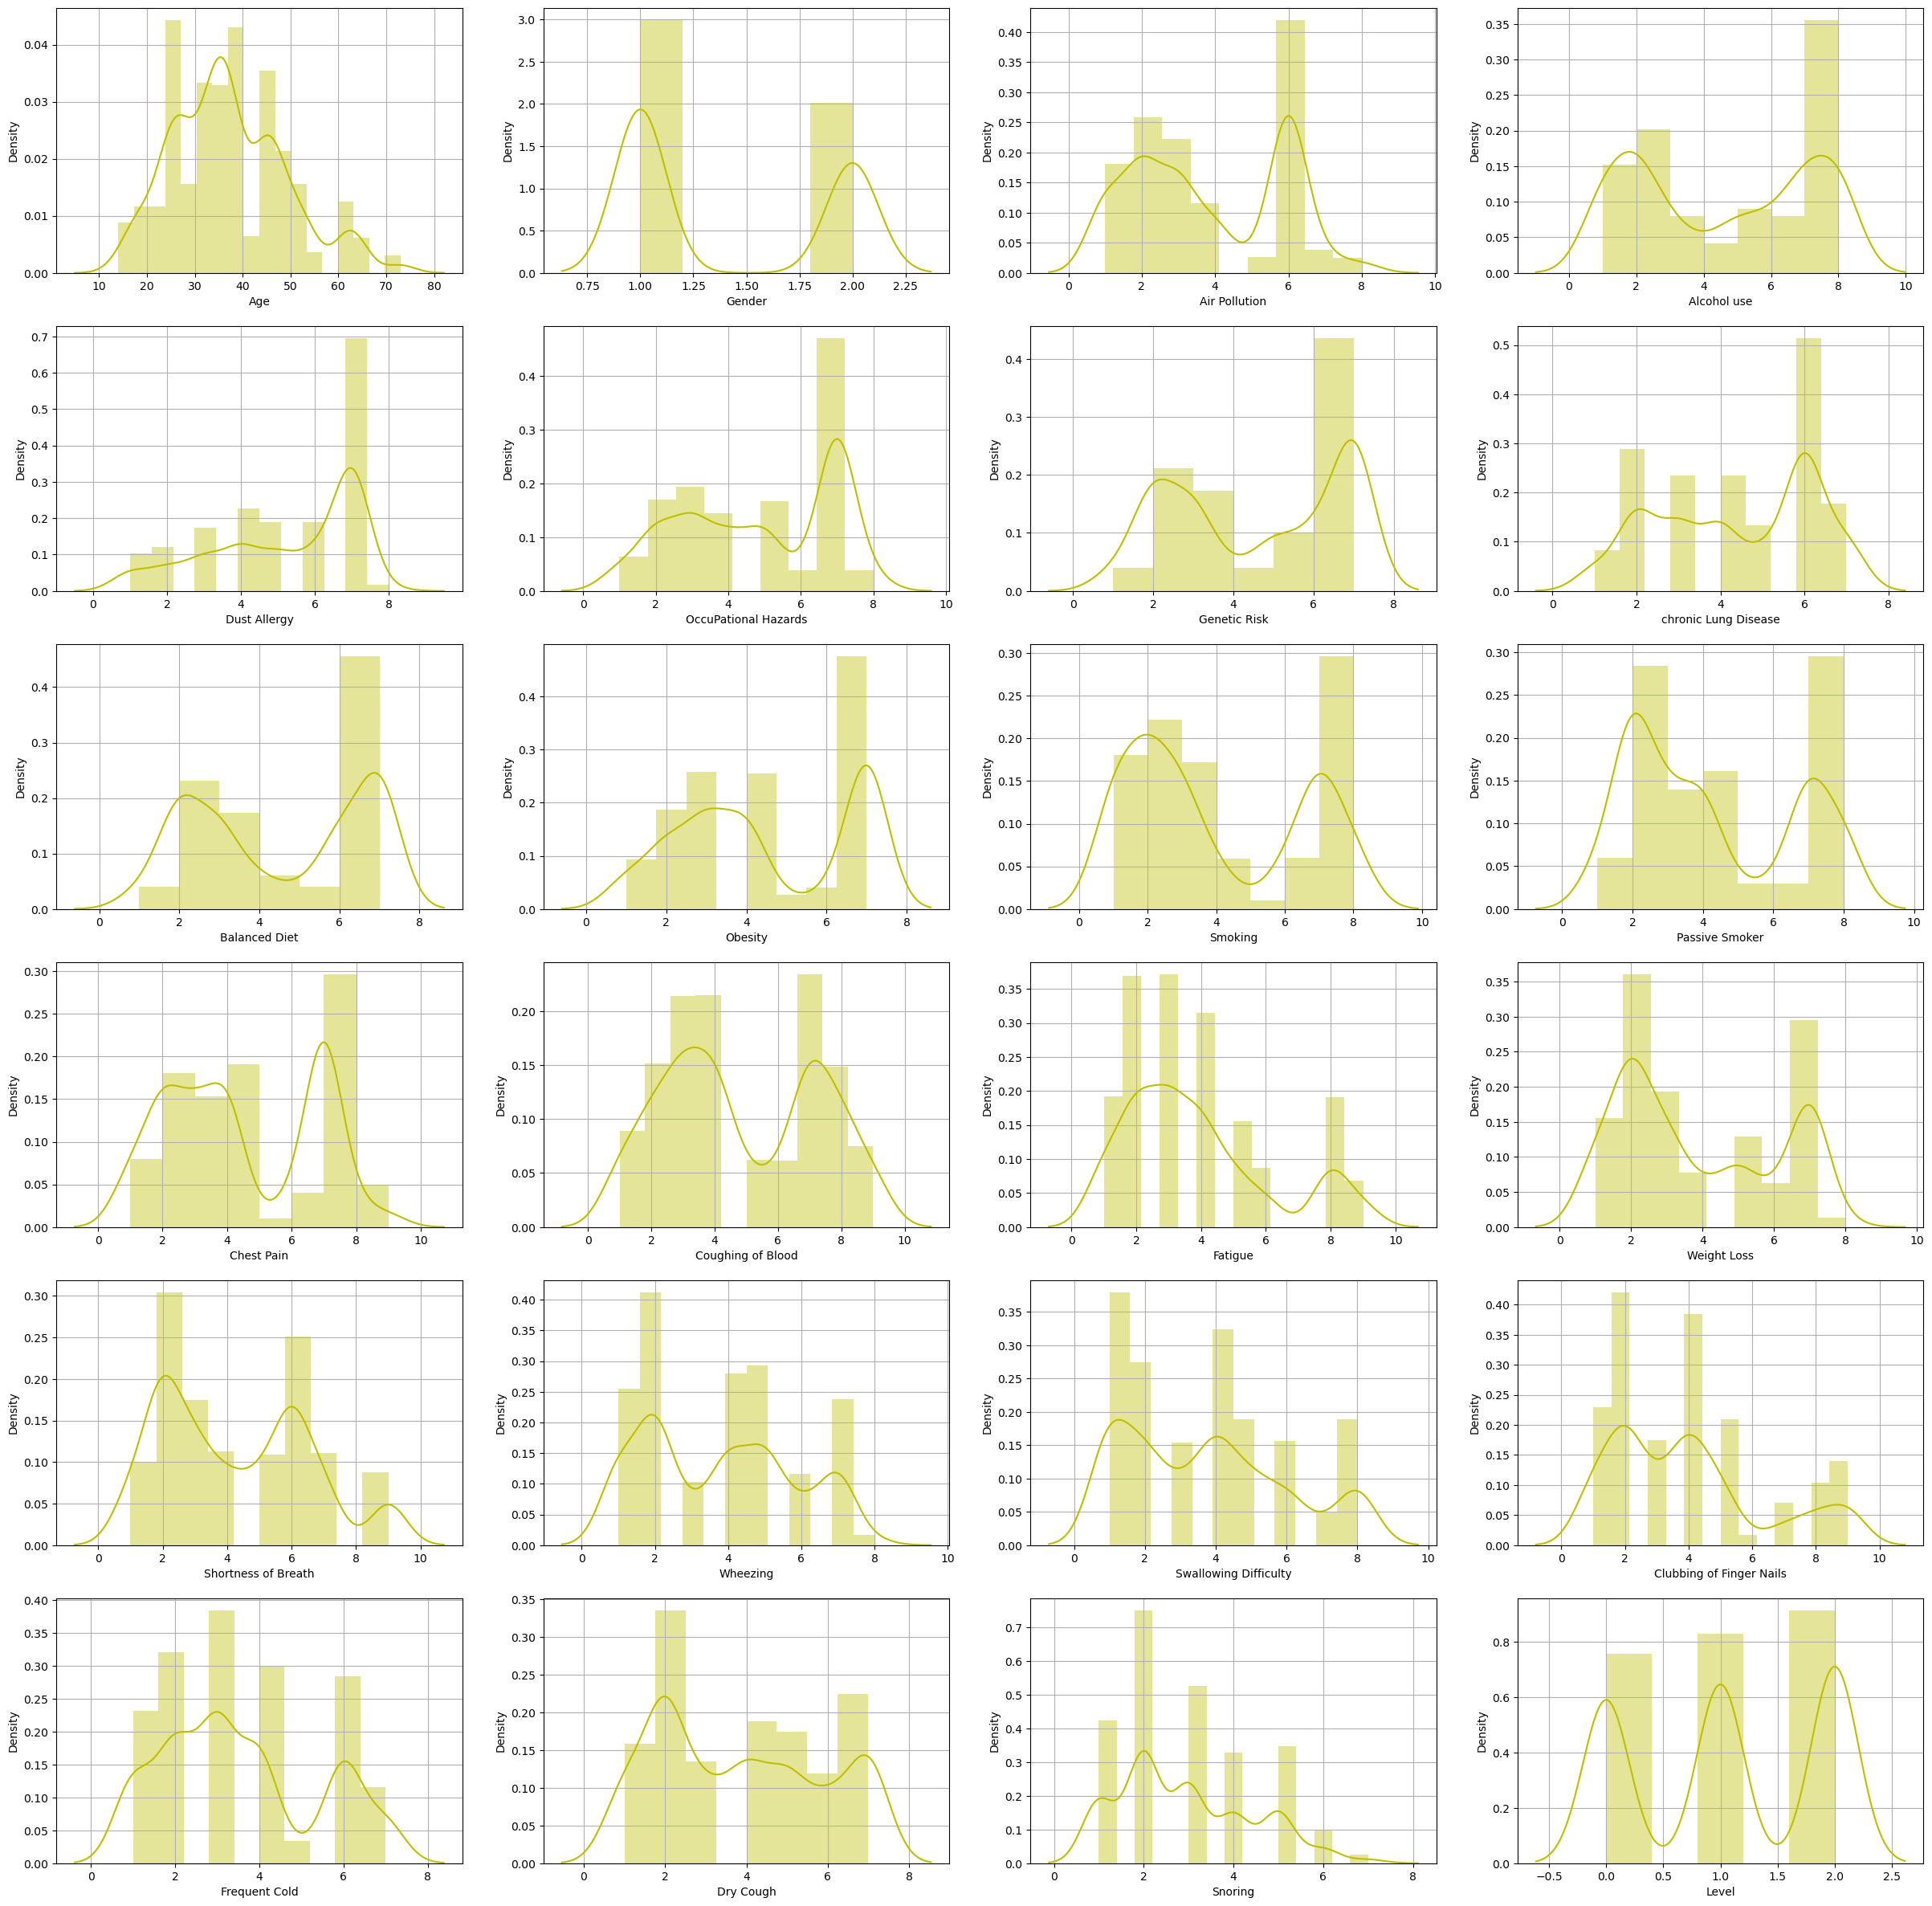

In [71]:
plt.figure(figsize = (30, 30))

for i in range(24):
    plt.subplot(6, 4, i+1)
    sns.distplot(df.iloc[:, i], color = 'y')
    plt.grid()

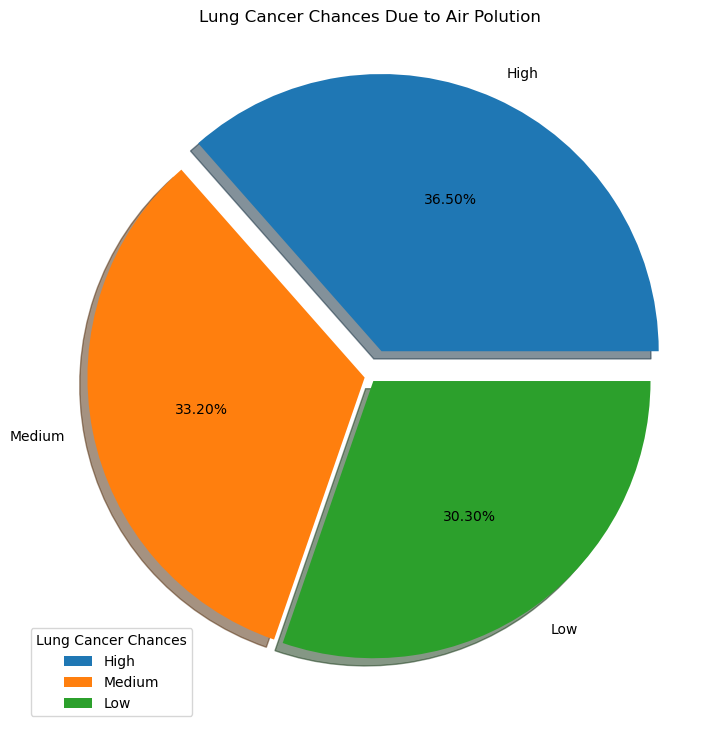

In [25]:
plt.figure(figsize = (11, 9))
plt.title("Lung Cancer Chances Due to Air Polution")
plt.pie(df['Level'].value_counts(), explode = (0.1, 0.02, 0.02), labels = ['High', 'Medium', 'Low'], autopct = "%1.2f%%", shadow = True)
plt.legend(title = "Lung Cancer Chances", loc = "lower left")

ValueError: Could not interpret input 'LUNG_CANCER'

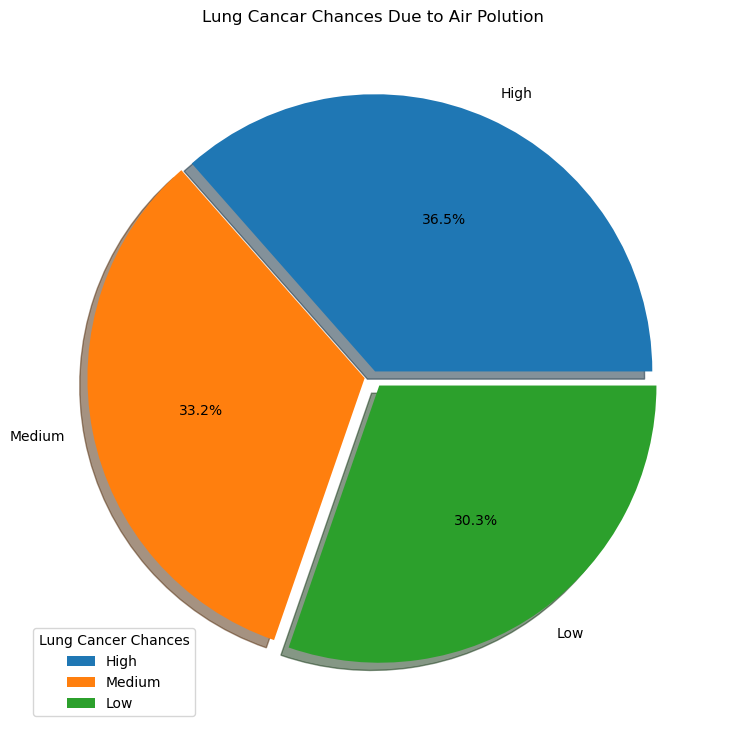

In [26]:
plt.figure(figsize = (11, 9))
plt.title("Lung Cancar Chances Due to Air Polution")
plt.pie(df.Level.value_counts(),explode=(0.02 ,0.03,0.04) ,labels=['High', 'Medium', 'Low'] ,autopct="%1.1f%%" ,shadow=True)
plt.legend(title = "Lung Cancer Chances", loc = "lower left")

plt.show()

In [27]:
## Split Data

In [28]:
x = df.iloc[:, 0:23]
x

Age  Gender  Air Pollution  Alcohol use  Dust Allergy  \
0     33       1              2            4             5   
1     17       1              3            1             5   
2     35       1              4            5             6   
3     37       1              7            7             7   
4     46       1              6            8             7   
..   ...     ...            ...          ...           ...   
995   44       1              6            7             7   
996   37       2              6            8             7   
997   25       2              4            5             6   
998   18       2              6            8             7   
999   47       1              6            5             6   

     OccuPational Hazards  Genetic Risk  chronic Lung Disease  Balanced Diet  \
0                       4             3                     2              2   
1                       3             4                     2              2   
2                       5             5                     4              6   
3                       7             6                     7              7   
4                       7             7                     6              7   
..                    ...           ...                   ...            ...   
995                     7             7                     6              7   
996                     7             7                     6              7   
997                     5             5                     4              6   
998                     7             7                     6              7   
999                     5             5                     4              6   

     Obesity  ...  Coughing of Blood  Fatigue  Weight Loss  \
0          4  ...                  4        3            4   
1          2  ...                  3        1            3   
2          7  ...                  8        8            7   
3          7  ...                  8        4            2   
4          7  ...                  9        3            2   
..       ...  ...                ...      ...          ...   
995        7  ...                  7        5            3   
996        7  ...                  7        9            6   
997        7  ...                  8        8            7   
998        7  ...                  9        3            2   
999        7  ...                  8        8            7   

     Shortness of Breath  Wheezing  Swallowing Difficulty  \
0                      2         2                      3   
1                      7         8                      6   
2                      9         2                      1   
3                      3         1                      4   
4                      4         1                      4   
..                   ...       ...                    ...   
995                    2         7                      8   
996                    5         7                      2   
997                    9         2                      1   
998                    4         1                      4   
999                    9         2                      1   

     Clubbing of Finger Nails  Frequent Cold  Dry Cough  Snoring  
0                           1              2          3        4  
1                           2              1          7        2  
2                           4              6          7        2  
3                           5              6          7        5  
4                           2              4          2        3  
..                        ...            ...        ...      ...  
995                         2              4          5        3  
996                         4              3          1        4  
997                         4              6          7        2  
998                         2              4          2        3  
999                         4              6          7        2  

[1000 rows x 23 

In [29]:
y=df.Level.values
y

array([0, 1, 2, 2, 2, 2, 0, 0, 1, 1, 2, 2, 1, 2, 0, 1, 1, 2, 2, 1, 2, 2,
       2, 2, 2, 1, 1, 1, 2, 1, 2, 2, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 1, 1, 1,
       1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 2,
       2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 0, 1, 2, 2, 2, 0, 0, 1, 1, 2, 2, 1, 2, 0, 1, 1, 2, 2, 1, 2,
       2, 2, 2, 1, 1, 1, 1, 2, 1, 2, 2, 1, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 1, 0, 2, 2, 2, 0, 0, 1, 1, 2, 2, 1, 0, 0, 1, 1, 2, 2, 1,
       2, 2, 2, 2, 0, 1, 1, 1, 2, 1, 2, 2, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,

In [30]:
x_train ,x_test ,y_train ,y_test =train_test_split(x ,y ,test_size=0.3 ,random_state=1) 

In [31]:
### Perform

In [32]:
def perform(y_pred):
    print("Precision : ", precision_score(y_test, y_pred, average = 'micro'))
    print("Recall : ", recall_score(y_test, y_pred, average = 'micro'))
    print("Accuracy : ", accuracy_score(y_test, y_pred))
    print("F1 Score : ", f1_score(y_test, y_pred, average = 'micro'))
    cm = confusion_matrix(y_test, y_pred)
    print("\n", cm)
    print("\n")
    print("**"*27 + "\n" + " "* 16 + "Classification Report\n" + "**"*27)
    print(classification_report(y_test, y_pred))
    print("**"*27+"\n")
    
    cm = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels=['Low', 'Medium', 'High'])
    cm.plot()

In [33]:
model_rf = RandomForestClassifier()
model_rf.fit(x_train, y_train)

RandomForestClassifier()

In [34]:
y_pred_rf = model_rf.predict(x_test)

Precision :  1.0
Recall :  1.0
Accuracy :  1.0
F1 Score :  1.0

 [[ 89   0   0]
 [  0  96   0]
 [  0   0 115]]


******************************************************
                Classification Report
******************************************************
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        89
           1       1.00      1.00      1.00        96
           2       1.00      1.00      1.00       115

    accuracy                           1.00       300
   macro avg       1.00      1.00      1.00       300
weighted avg       1.00      1.00      1.00       300

******************************************************



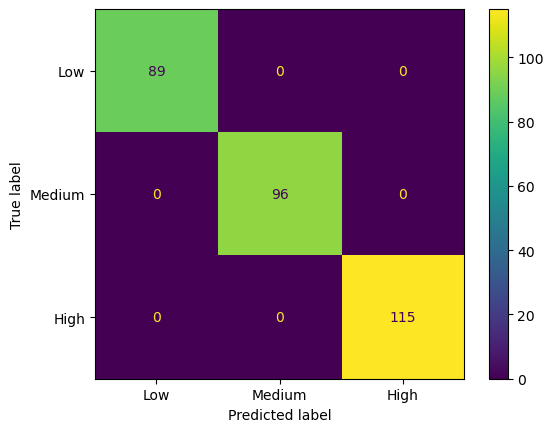

In [35]:
perform(y_pred_rf)

In [36]:
##### Save The Model 

In [37]:
filename = 'Lung_Cancer_RF.h5'
pickle.dump(model_rf, open(filename, 'wb'))
print("Model Saved.")

Model Saved.
